In [1]:
# In this project we are going to analyze the dataset of Issues from Github that uses ChatGPT to review the PR's'

In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [23]:
import pandas as pd
import json
import os

# Define the directory where your JSON files are stored
json_directory = 'github_dataset'
# Function to load JSON data and normalize ChatGPT sharing information
def load_and_normalize_json(json_directory):
    # List to store DataFrames
    dataframes = []
    
    # List all JSON files in the directory
    json_files = [file for file in os.listdir(json_directory) if file.endswith(".json")]
    
    # Loop through JSON files and read them into DataFrames
    for file in json_files:
        file_path = os.path.join(json_directory, file)
        print(f"Processing file: {file}")
        try:
            with open(file_path, 'r') as json_file:
                json_data = json.load(json_file)

            # Loop through each "Source" in the JSON
            for source in json_data['Sources']:
                # Check if 'ChatgptSharing' key exists
                if 'ChatgptSharing' in source:
                    # Normalize the ChatGPT sharing data
                    chatgpt_sharing_df = pd.json_normalize(source, record_path=['ChatgptSharing'])
                    # Add the filename as a column
                    chatgpt_sharing_df['filename'] = file
                    dataframes.append(chatgpt_sharing_df)
                else:
                    print(f"'ChatgptSharing' key does not exist in source of file {file}")

        except Exception as e:
            print(f"An error occurred while processing {file}: {e}")

    # Concatenate all individual DataFrames into a single DataFrame if any exist
    if dataframes:
        all_chatgpt_sharing_df = pd.concat(dataframes, ignore_index=True)
    else:
        all_chatgpt_sharing_df = pd.DataFrame()
    
    return all_chatgpt_sharing_df

# Call the function and get the DataFrame
final_chatgpt_sharing_df = load_and_normalize_json(json_directory)

# Display the DataFrame head to verify
if not final_chatgpt_sharing_df.empty:
    print(final_chatgpt_sharing_df.head())
else:
    print("No data was found with the key 'ChatgptSharing'.")

# Optionally, save the DataFrame to a CSV file if it's not empty
if not final_chatgpt_sharing_df.empty:
    csv_file_path = os.path.join(json_directory, 'chatgpt_sharing_data.csv')
    final_chatgpt_sharing_df.to_csv(csv_file_path, index=False)
    print(f"ChatGPT sharing data saved to {csv_file_path}")


Processing file: 20230831_060603_pr_sharings.json
Processing file: 20230907_091631_pr_sharings.json
Processing file: 20230817_125147_pr_sharings.json
Processing file: 20230824_100450_pr_sharings.json
Processing file: 20230727_195927_pr_sharings.json
Processing file: 20230803_093947_pr_sharings.json
Processing file: 20230810_123110_pr_sharings.json
Processing file: 20230914_074826_pr_sharings.json
                                                 URL  Status  \
0  https://chat.openai.com/share/9fb7d601-2a86-40...     200   
1  https://chat.openai.com/share/acece149-6d4b-45...     200   
2  https://chat.openai.com/share/8bd33825-e8c6-44...     200   
3  https://chat.openai.com/share/2c4b0dba-429c-4c...     200   
4  https://chat.openai.com/share/a3f23f8c-935e-4b...     200   

  DateOfConversation                DateOfAccess  \
0    August 25, 2023  2023-08-31 05:56:44.392433   
1    August 23, 2023  2023-08-31 05:56:46.273656   
2       July 5, 2023  2023-08-31 05:56:46.953811   
3      

In [24]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from ast import literal_eval

# Ensure you have the stopwords corpus downloaded; if not, uncomment and run this line:
# nltk.download('stopwords')

# Read the CSV file
csv_file_path = 'github_dataset/chatgpt_sharing_data.csv'  # Update this to the path of your CSV file
df = pd.read_csv(csv_file_path)

# Check if 'Conversations' column exists
if 'Conversations' in df.columns:
    # Initialize NLTK's list of stopwords
    stop_words = set(stopwords.words('english'))
    
    # Function to remove stop words from a string
    def remove_stop_words(text):
        # Tokenize the text into words
        words = nltk.word_tokenize(text)
        # Remove stop words
        filtered_words = [word for word in words if word.lower() not in stop_words]
        # Join words back into a string
        return ' '.join(filtered_words)

    # Clean the 'Conversations' column
    cleaned_conversations = []
    for row in df['Conversations']:
        if pd.notnull(row):
            # The Conversations column might be in string representation of lists
            # Convert it back to a list of dictionaries
            conversations = literal_eval(row)
            # Assuming each conversation is a dictionary with a 'Prompt' and 'Answer' key
            for conversation in conversations:
                # Remove stop words from 'Prompt' and 'Answer'
                conversation['Prompt'] = remove_stop_words(conversation['Prompt'])
                conversation['Answer'] = remove_stop_words(conversation['Answer'])
            cleaned_conversations.append(conversations)
        else:
            # Append a NaN or empty list if the value is not valid
            cleaned_conversations.append(row)  # Or use [] if you want to store an empty list instead of NaN

    # Update the DataFrame with the cleaned conversations
    df['Conversations'] = cleaned_conversations
    
    # Optionally, save the updated DataFrame back to a CSV file
    cleaned_csv_file_path = 'github_dataset/cleaned_chatgpt_sharing_data.csv'  # Update this to your desired path
    df.to_csv(cleaned_csv_file_path, index=False)
    
    print("Cleaned data saved to", cleaned_csv_file_path)
else:
    print("The 'Conversations' column does not exist in the DataFrame.")


Cleaned data saved to github_dataset/cleaned_chatgpt_sharing_data.csv


In [20]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from ast import literal_eval

# Ensure you have the stopwords corpus downloaded; if not, uncomment and run this line:
# nltk.download('stopwords')

# Read the CSV file
csv_file_path = 'github_dataset/chatgpt_sharing_data.csv'  # Update this to the path of your CSV file
df = pd.read_csv(csv_file_path)

# Check if 'Conversations' column exists
if 'Conversations' in df.columns:
    # Initialize NLTK's list of stopwords
    stop_words = set(stopwords.words('english'))
    
    # Function to remove stop words and return tokens
    def remove_stop_words(text):
        # Tokenize the text into words
        words = nltk.word_tokenize(text)
        # Remove stop words
        filtered_tokens = [word for word in words if word.lower() not in stop_words]
        # Return the list of filtered tokens
        return filtered_tokens

    # Clean the 'Conversations' column
    cleaned_conversations = []
    for row in df['Conversations']:
        if pd.notnull(row):
            # The Conversations column might be in string representation of lists
            # Convert it back to a list of dictionaries
            conversations = literal_eval(row)
            # Assuming each conversation is a dictionary with a 'Prompt' and 'Answer' key
            for conversation in conversations:
                # Remove stop words from 'Prompt' and 'Answer' and keep tokens
                conversation['Prompt'] = remove_stop_words(conversation['Prompt'])
                conversation['Answer'] = remove_stop_words(conversation['Answer'])
            cleaned_conversations.append(conversations)
        else:
            # Append a NaN or empty list if the value is not valid
            cleaned_conversations.append(row)  # Or use [] if you want to store an empty list instead of NaN

    # Update the DataFrame with the cleaned conversations
    df['Conversations'] = cleaned_conversations
    
    # Optionally, save the updated DataFrame back to a CSV file
    cleaned_csv_file_path = 'github_dataset/cleaned_chatgpt_sharing_data.csv'  # Update this to your desired path
    df.to_csv(cleaned_csv_file_path, index=False)
    
    print("Cleaned data saved to", cleaned_csv_file_path)
else:
    print("The 'Conversations' column does not exist in the DataFrame.")


Cleaned data saved to github_dataset/cleaned_chatgpt_sharing_data.csv


In [25]:
import re
# Define your bug categories with their corresponding regex patterns
bug_categories = {
    "Null Pointer Exception": re.compile(r"(?i)null pointer|NPE"),
    "String Exception": re.compile(r"(?i)string (index|out of range)|stringexception"),
    "Division by Zero": re.compile(r"(?i)division by zero|divide by zero|zerodivision"),
    "Memory Leak": re.compile(r"(?i)memory leak|leaked memory|memory leak detected"),
    "File Not Found": re.compile(r"(?i)file not found|file not found exception"),
    "Index Out of Bounds": re.compile(r"(?i)index out of bounds|out of bounds"),
    "Type Error": re.compile(r"(?i)type error|type mismatch|typeerror"),
    "Logic Error": re.compile(r"(?i)logic error|logical error|inconsistent logic"),
    "Performance Issue": re.compile(r"(?i)performance issue|performance problem|slow performance"),
    "Security Vulnerability": re.compile(r"(?i)security issue|security vulnerability|security problem"),
    "Compatibility Issue": re.compile(r"(?i)compatibility issue|compatibility problem|incompatibility"),
    "Race Condition": re.compile(r"(?i)race condition|concurrency issue|race hazard"),
    "Deadlock": re.compile(r"(?i)deadlock|deadly embrace|deadly embrace condition"),
    "Infinite Loop": re.compile(r"(?i)infinite loop|endless loop|looping indefinitely"),
    "Resource Leak": re.compile(r"(?i)resource leak|resource leakage|resource not released"),
    "Data Corruption": re.compile(r"(?i)data corruption|corrupted data|data integrity issue"),
    "Timeout Error": re.compile(r"(?i)timeout error|timed out|exceeded timeout"),
}

def label_conversation(conversation_text, bug_categories):
    labels = []
    for category, regex in bug_categories.items():
        if regex.search(conversation_text):
            labels.append(category)
    return labels if labels else ["No Bug Category Detected"]

# Ensure you have the stopwords corpus downloaded; if not, uncomment and run this line:
# nltk.download('stopwords')

# Read the CSV file
csv_file_path = 'github_dataset/cleaned_chatgpt_sharing_data.csv'  # Update this to the path of your CSV file
df = pd.read_csv(csv_file_path)

if 'Conversations' in df.columns:
    stop_words = set(stopwords.words('english'))

    def remove_stop_words(text):
        words = nltk.word_tokenize(text)
        return [word for word in words if word.lower() not in stop_words]

    cleaned_conversations = []
    conversation_labels = []

    for row in df['Conversations']:
        if pd.notnull(row):
            conversations = literal_eval(row)
            full_conversation_text = " ".join([" ".join(conv['Prompt']) + " " + " ".join(conv['Answer']) for conv in conversations])
            cleaned_text = remove_stop_words(full_conversation_text)
            cleaned_text_str = " ".join(cleaned_text)  # Convert list of words back to a single string
            labels = label_conversation(cleaned_text_str, bug_categories)
            conversation_labels.append(labels)
        else:
            cleaned_conversations.append(row)
            conversation_labels.append(["No Conversations"])

    df['Bug'] = conversation_labels

    labeled_csv_file_path = 'github_dataset/labeled_chatgpt_sharing_data.csv'
    df.to_csv(labeled_csv_file_path, index=False)

    print("Labeled data saved to", labeled_csv_file_path)
else:
    print("The 'Conversations' column does not exist in the DataFrame.")

Labeled data saved to github_dataset/labeled_chatgpt_sharing_data.csv


In [21]:
import pandas as pd
import re
from ast import literal_eval

# Define your bug categories
bug_categories = {
    "Null Pointer Exception": re.compile(r"(?i)null pointer|NPE"),
    "String Exception": re.compile(r"(?i)string (index|out of range)|stringexception"),
    "Division by Zero": re.compile(r"(?i)division by zero|divide by zero|zerodivision"),
    "Memory Leak": re.compile(r"(?i)memory leak|leaked memory|memory leak detected"),
    "File Not Found": re.compile(r"(?i)file not found|file not found exception"),
    "Index Out of Bounds": re.compile(r"(?i)index out of bounds|out of bounds"),
    "Type Error": re.compile(r"(?i)type error|type mismatch|typeerror"),
    "Logic Error": re.compile(r"(?i)logic error|logical error|inconsistent logic"),
    "Performance Issue": re.compile(r"(?i)performance issue|performance problem|slow performance"),
    "Security Vulnerability": re.compile(r"(?i)security issue|security vulnerability|security problem"),
    "Compatibility Issue": re.compile(r"(?i)compatibility issue|compatibility problem|incompatibility"),
    "Race Condition": re.compile(r"(?i)race condition|concurrency issue|race hazard"),
    "Deadlock": re.compile(r"(?i)deadlock|deadly embrace|deadly embrace condition"),
    "Infinite Loop": re.compile(r"(?i)infinite loop|endless loop|looping indefinitely"),
    "Resource Leak": re.compile(r"(?i)resource leak|resource leakage|resource not released"),
    "Data Corruption": re.compile(r"(?i)data corruption|corrupted data|data integrity issue"),
    "Timeout Error": re.compile(r"(?i)timeout error|timed out|exceeded timeout"),
}

# Initialize a dictionary to count occurrences of each bug category
bug_category_counts = {category: 0 for category in bug_categories}

# Read the labeled data
csv_file_path = 'github_dataset/labeled_chatgpt_sharing_data.csv'
df = pd.read_csv(csv_file_path)

# Check if the 'Labels' column exists
if 'Bug' in df.columns:
    # Loop through each row in the DataFrame
    for labels_str in df['Bug']:
        # Convert the string representation back to a list
        labels_list = literal_eval(labels_str)
        
        # Increment the count for each label
        for label in labels_list:
            if label in bug_category_counts:
                bug_category_counts[label] += 1

    # Print the bug category counts
    print("Bug Category Counts:")
    for category, count in bug_category_counts.items():
        print(f"{category}: {count} mention(s)")
else:
    print("The 'Bug' column does not exist in the DataFrame.")


Bug Category Counts:
Null Pointer Exception: 5 mention(s)
String Exception: 0 mention(s)
Division by Zero: 0 mention(s)
Memory Leak: 0 mention(s)
File Not Found: 0 mention(s)
Index Out of Bounds: 0 mention(s)
Type Error: 45 mention(s)
Logic Error: 0 mention(s)
Performance Issue: 13 mention(s)
Security Vulnerability: 0 mention(s)
Compatibility Issue: 13 mention(s)
Race Condition: 16 mention(s)
Deadlock: 16 mention(s)
Infinite Loop: 8 mention(s)
Resource Leak: 0 mention(s)
Data Corruption: 0 mention(s)
Timeout Error: 0 mention(s)


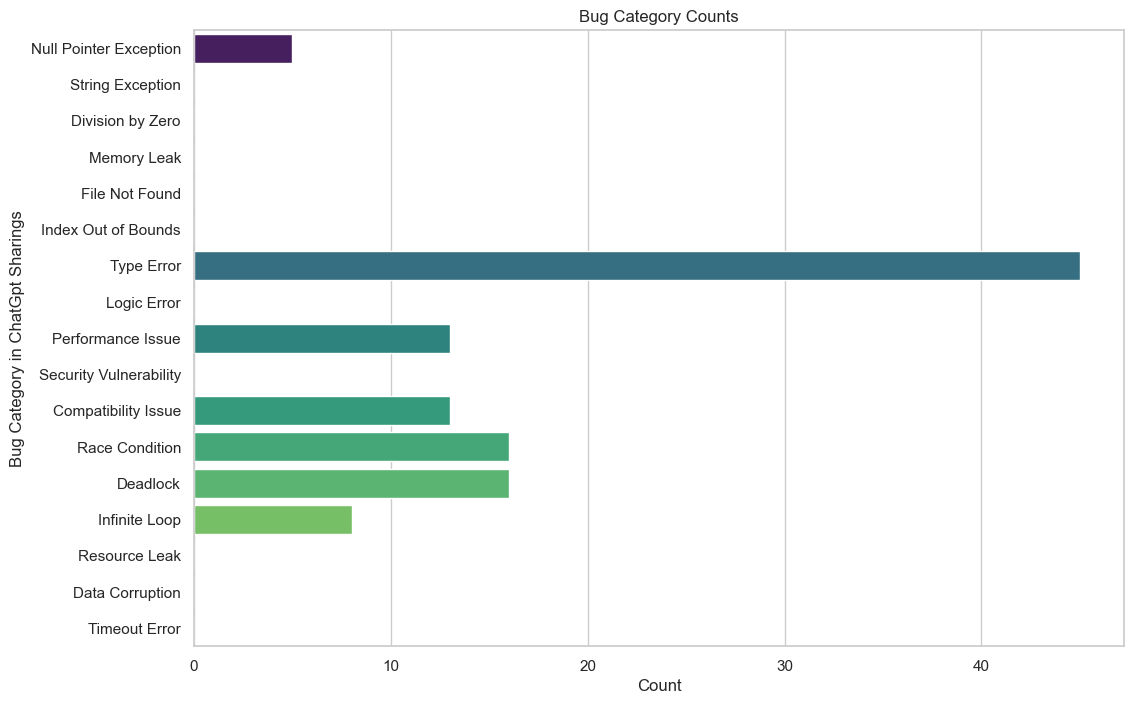

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Prepare data for plotting
categories = list(bug_category_counts.keys())
counts = list(bug_category_counts.values())

# Create a bar plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.barplot(x=counts, y=categories, palette="viridis")

# Add titles and labels
plt.title('Bug Category Counts')
plt.xlabel('Count')
plt.ylabel('Bug Category in ChatGpt Sharings')

# Show the plot
plt.show()
